In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from keras_preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications.mobilenet import MobileNet
# from tensorflow.keras.applications import MobileNetV2 as MobileNet
#kita pake mobilenet yang dari dosen pembimbing
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#cara masukin dataset dari email ke drive:
# kita add shortcut dulu folder nya
# terus, pas kita mau add shortcut, inget inget dimana kita taruhnya, dan namanya, dan masukin ke sini:
data_path = '/content/drive/MyDrive/tyres_dataset/tyre/'

# dataset link: https://drive.google.com/drive/folders/1EqTFf8pUf1cjdxBfqJJu4QHPqDK6Gtwo?usp=sharing

Mounted at /content/drive


In [ ]:
def mobilenet(input_shape, n_classes, activation_func):
  
  def mobilenet_block(x, f, s=1):
    x = DepthwiseConv2D(3, strides=s, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(f, 1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
    
    
  input = Input(input_shape)

  x = Conv2D(32, 3, strides=2, padding='same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  x = mobilenet_block(x, 64)
  x = mobilenet_block(x, 128, 2)
  x = mobilenet_block(x, 128)

  x = mobilenet_block(x, 256, 2)
  x = mobilenet_block(x, 256)

  x = mobilenet_block(x, 512, 2)
  for _ in range(5):
    x = mobilenet_block(x, 512)

  x = mobilenet_block(x, 1024, 2)
  x = mobilenet_block(x, 1024)
  
  x = GlobalAvgPool2D()(x)
  
  output = Dense(n_classes, activation=activation_func)(x)
  
  model = Model(input, output)
  return model

In [ ]:
#network: mobilenet
#preprocesing: resize, augmentasi (rotasi 90)
#aktivasi: softmax

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.,
                                   rotation_range=90,
                                   #width_shift_range=0.2,
                                   #height_shift_range=0.2,
                                   zoom_range=0.1,
                                   validation_split = 0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(data_path, 
                                                    shuffle = True,
                                                    batch_size=8, ## <- jadi salah satu parameter!
                                                    class_mode='binary',
                                                    subset = 'training',
                                                    target_size=(150,150))


valid_generator = train_datagen.flow_from_directory(
    data_path, 
    shuffle = True,
    batch_size=8,
    class_mode='binary',
    subset = 'validation',
    target_size=(150,150))

Found 832 images belonging to 2 classes.
Found 207 images belonging to 2 classes.


In [ ]:
#using pretrained, 

# #pretrained = MobileNet(include_top=False, weights='imagenet',classes=2, dropout=0.1, input_shape=(150,150,3))
# pretrained = MobileNet(include_top=False, weights='imagenet',classes=2, input_shape=(150,150,3))
# pretrained.trainable = False

In [ ]:
# model = tf.keras.models.Sequential([
#         tf.keras.layers.InputLayer( input_shape=(150,150,3)),
#         pretrained,
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(512,activation='relu'),
#         tf.keras.layers.Dropout(0.5),
#         tf.keras.layers.Dense(1, activation='sigmoid')
#     ])

In [ ]:
# using bu sofi's Recipe: 

In [ ]:
input_shape = 64,64, 3
n_classes = 1 
activation_func = 'sigmoid'

model = mobilenet(input_shape, n_classes, activation_func)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 32, 32, 32)        0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 32, 32, 32)       320       
 Conv2D)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128   

In [ ]:
model.compile(optimizer = 'Adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [ ]:
history = model.fit(train_generator, validation_data = valid_generator,
                    epochs=100
                    ) 

Epoch 1/100
104/104 [==============================] - 223s 2s/step - loss: 0.0000e+00 - accuracy: 0.5385 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 2/100
104/104 [==============================] - 59s 570ms/step - loss: 0.0000e+00 - accuracy: 0.5192 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 3/100
104/104 [==============================] - 59s 570ms/step - loss: 0.0000e+00 - accuracy: 0.5192 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 4/100
104/104 [==============================] - 59s 571ms/step - loss: 0.0000e+00 - accuracy: 0.5192 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 5/100
104/104 [==============================] - 59s 567ms/step - loss: 0.0000e+00 - accuracy: 0.5192 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 6/100
104/104 [==============================] - 59s 573ms/step - loss: 0.0000e+00 - accuracy: 0.5192 - val_loss: 0.0000e+00 - val_accuracy: 0.5217
Epoch 7/100
104/104 [==============================] - 60s 576ms/step - loss: 

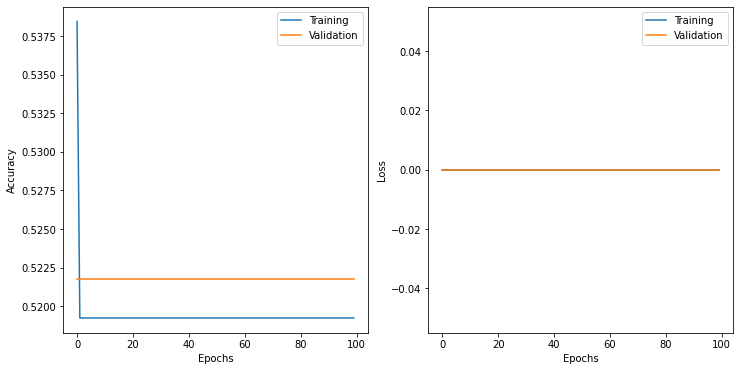

In [ ]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # jumlah row, jumlah column, column/row berapa
plt.plot(train_acc, label='Training')
plt.plot(val_acc, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2) # jumlah row, jumlah column, column/row berapa
plt.plot(train_loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()

In [ ]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
new_model = model

probabilities = new_model.predict(valid_generator)


predictions = []
for prob in probabilities:
   best_index = np.argmax(prob)
   predictions.append(best_index)

labels = valid_generator.classes
tn, fp, fn, tp = confusion_matrix(labels, predictions).ravel()
cm = [[tp, fp],
      [fn, tn]]
cr = classification_report(labels, predictions)
print(cm)
print(cr)


[[0, 0], [99, 108]]
              precision    recall  f1-score   support

           0       0.52      1.00      0.69       108
           1       0.00      0.00      0.00        99

    accuracy                           0.52       207
   macro avg       0.26      0.50      0.34       207
weighted avg       0.27      0.52      0.36       207



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model.save('kualitas_ban_100Epochs.h5')